   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
K=1 → Accuracy: 0.9667
K=3 → Accuracy: 1.0000
K=5 → Accuracy: 1.0000
K=7 → Accuracy: 1.0000
K=9 → Accuracy: 1.0000


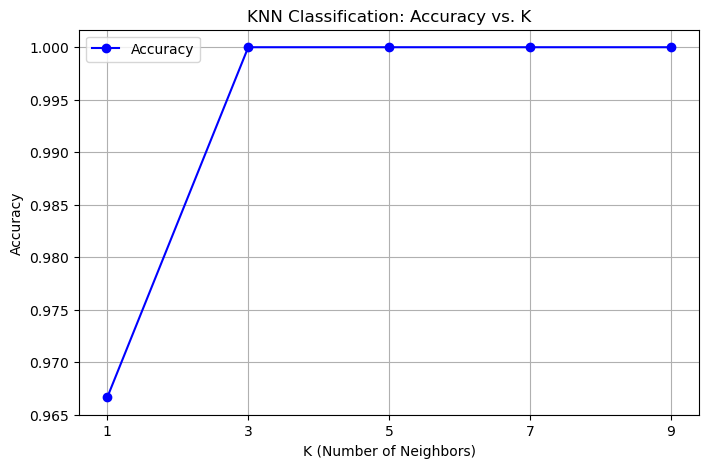


🔹 Best K = 3 with Accuracy = 1.0000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.csv') 

print(df.head())
print(df.info()) 


target_column = 'species'  

X = df.drop(columns=[target_column])
y = df[target_column] 

X.fillna(X.median(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    print(f"K={k} → Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Classification: Accuracy vs. K")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"\n🔹 Best K = {best_k} with Accuracy = {best_accuracy:.4f}")



   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    Male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    Male  35.0      0      0   8.0500   

   Embarked  
0         3  
1         1  
2         3  
3         3  
4         3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int

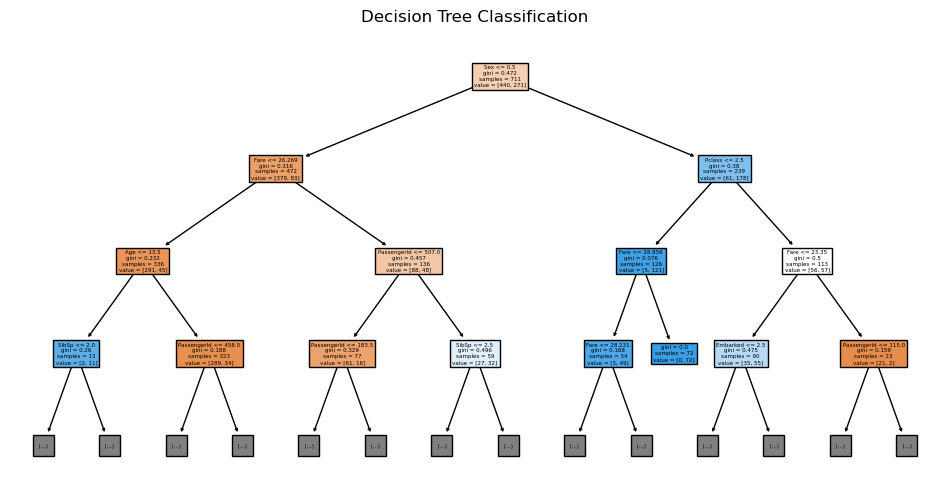

🔹 Accuracy: 0.7303

🔹 Top Feature Split:
       Feature  Importance
2          Sex    0.283831
6         Fare    0.210667
0  PassengerId    0.187604


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

df = pd.read_csv('SVMtrain.csv') 

print(df.head())
print(df.info()) 
print(df.describe()) 
target_column = 'Survived'

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df.fillna(df.median(), inplace=True)

X = df.drop(columns=[target_column])  
y = df[target_column] 

if y.nunique() > 10:  
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if y.nunique() <= 10: 
    model = DecisionTreeClassifier(random_state=42)
    model_type = "Classification"
else:
    model = DecisionTreeRegressor(random_state=42)
    model_type = "Regression"

model.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=df.drop(columns=[target_column]).columns, filled=True, max_depth=3)
plt.title(f"Decision Tree {model_type}")
plt.show()

y_pred = model.predict(X_test)

if model_type == "Classification":
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🔹 Accuracy: {accuracy:.4f}")
else:
    mse = mean_squared_error(y_test, y_pred)
    print(f"🔹 Mean Squared Error: {mse:.4f}")

feature_importances = pd.DataFrame({'Feature': df.drop(columns=[target_column]).columns,
                                    'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\n🔹 Top Feature Split:")
print(feature_importances.head(3)) 


                                     message_content  is_spam
0  Hello Lonnie,\n\nJust wanted to touch base reg...        0
1  Congratulations, you've won a prize! Call us n...        1
2  You have been pre-approved for a credit card w...        1
3  Limited time offer, act now! Only a few spots ...        1
4  Your loan has been approved! Transfer funds to...        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
🔹 F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       

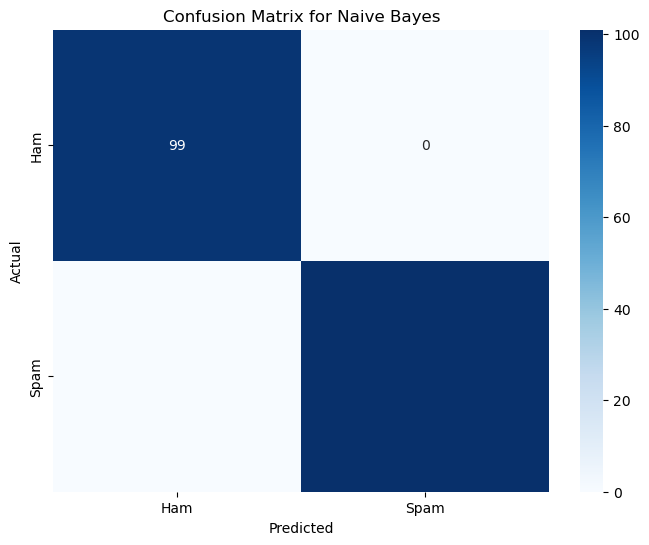


🔹 Insight:
Naive Bayes assumes that features are independent, which may not always be true, especially in text data where words may have dependencies. However, it can still work well for problems like spam detection where the assumption holds reasonably well.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load Dataset (Replace 'your_dataset.csv' with actual dataset)
df = pd.read_csv('spam_dataset.csv')  # 🔹 Replace with actual dataset

# Step 2: Explore Text and Label Columns
print(df.head())  # Show first 5 rows
print(df.info())  # Show dataset structure

# 🔹 Assuming columns 'text' for messages and 'label' for target class (change if different)
text_column = 'message_content'  # Replace with your text column
label_column = 'is_spam'  # Replace with your target column

# Step 3: Preprocess Text Data (Convert to Numeric Features)
# Choose TfidfVectorizer or CountVectorizer based on preference (we'll use TfidfVectorizer here)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Adjust max_features based on dataset size
X = vectorizer.fit_transform(df[text_column])  # Convert text to numeric matrix
y = df[label_column]  # Target variable

# Step 4: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Multinomial Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# F1-Score and Classification Report
f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
print(f"🔹 F1-Score: {f1_score:.4f}")
print(classification_report(y_test, y_pred))  # Prints Precision, Recall, F1-Score for each class

# Step 7: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 8: Strength or Limitation of Naive Bayes
print("\n🔹 Insight:")
print("Naive Bayes assumes that features are independent, which may not always be true, especially in text data where words may have dependencies. However, it can still work well for problems like spam detection where the assumption holds reasonably well.")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Base Model Accuracy: 0.7512
AdaBoost Accuracy: 0.8780
Base Model ROC-AUC: 0.7511
AdaBoost ROC-AUC: 0.8781
                        Model  Accuracy   ROC-AUC
0  Base Model (Decision Tree)  0.751220  0.751142
1                    AdaBoost  0.878049  0.878117


<Figure size 800x600 with 0 Axes>

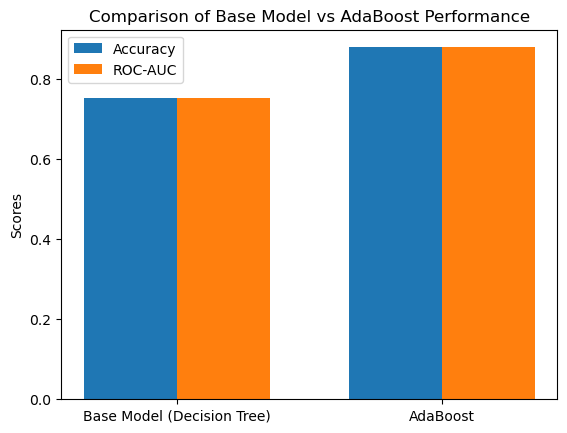

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart.csv') 

features = df.drop(columns=['target']) 
target = df['target'] 

features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)

ada_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)
y_pred_ada = ada_model.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

roc_auc_base = roc_auc_score(y_test, y_pred_base)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)

print(f"Base Model Accuracy: {accuracy_base:.4f}")
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print(f"Base Model ROC-AUC: {roc_auc_base:.4f}")
print(f"AdaBoost ROC-AUC: {roc_auc_ada:.4f}")

results = pd.DataFrame({
    'Model': ['Base Model (Decision Tree)', 'AdaBoost'],
    'Accuracy': [accuracy_base, accuracy_ada],
    'ROC-AUC': [roc_auc_base, roc_auc_ada]
})

print(results)

plt.figure(figsize=(8, 6))
x = np.arange(2)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x + width/2, results['ROC-AUC'], width, label='ROC-AUC')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Base Model vs AdaBoost Performance')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'])
ax.legend()

plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('SVMtrain.csv')

# Separate features and target
features = df.drop(columns=['Survived'])
target = df['Survived']

# Convert categorical columns to numeric using one-hot encoding
features = pd.get_dummies(features, drop_first=True)

# Fill missing values with the mean for numeric columns
features = features.fillna(features.mean())

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Optimal Parameters: {best_params}")

# Get the best model from the grid search
best_tree = grid_search.best_estimator_

# Train the best model
best_tree.fit(X_train, y_train)

# Predict with the tuned model
y_pred_best = best_tree.predict(X_test)

# Calculate accuracy and MSE for the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

# Train an untuned decision tree model
untuned_model = DecisionTreeClassifier(random_state=42)
untuned_model.fit(X_train, y_train)

# Predict with the untuned model
y_pred_untuned = untuned_model.predict(X_test)

# Calculate accuracy and MSE for the untuned model
accuracy_untuned = accuracy_score(y_test, y_pred_untuned)
mse_untuned = mean_squared_error(y_test, y_pred_untuned)

# Print the metrics comparison
print(f"Metrics Comparison:")
print(f"Untuned Model Accuracy: {accuracy_untuned:.4f}")
print(f"Tuned Model Accuracy: {accuracy_best:.4f}")
print(f"Untuned Model MSE: {mse_untuned:.4f}")
print(f"Tuned Model MSE: {mse_best:.4f}")


Optimal Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Metrics Comparison:
Untuned Model Accuracy: 0.7416
Tuned Model Accuracy: 0.7753
Untuned Model MSE: 0.2584
Tuned Model MSE: 0.2247
